### Predicting cancer using classification

A health facility has been experiencing a lot of death due to cancer with a few survivors. They’ve recently been told on how AI can be used to predict whether a cancer case is benign or malignant on the fly without having the patient go through rigorous/expensive procedures. They now seek your expertise as a Data Scientist and have provided you with a dataset with the link below:


#### Q1. Define an approach you would take to solve the problem and document it.

##### Problem statement:

The problem is a binary classification task where we need to predict whether a cancer case is benign or malignant based on certain features.

##### Approach:
- Data Preparation

- Data Exploration

- Data Preprocessing

- Model Selection and Training

- Model Evaluation

- Deployment

To make sure that the model predicts malignant cases correctly. Here are some evaluation metrics that could be considered:

`1` Sensitivity (True Positive Rate)

`2` Precision

`3` Recall 

`4` F1 Score

`5` Specificity (True Negative Rate)


#### Q3. Possible algorithms

 `1` Logistic Regression
 
 `2` Decision Trees
 
 `3` Random Forest
 
 `4` Support Vector Machines (SVM)
 
 `5` Gradient Boosting Machines (GBM)
 
 `6` Neural Networks




In [63]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [64]:
# load the data

df = pd.read_csv('cancer dataset.csv')

In [65]:
df.head()

,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe
0,4;1;1;1;2;3;1;1;1;begnin
1,1;5;8;6;5;8;7;10;1;malignant
2,3;2;2;3;2;1;1;1;1;begnin
3,3;1;1;3;8;1;5;8;1;begnin
4,10;4;6;1;2;10;5;3;1;malignant


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe  300 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


In [67]:
df.describe()

,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe
count,300
unique,212
top,1;1;1;1;2;1;1;1;1;begnin
freq,16


In [68]:
df.shape

(300, 1)

In [69]:
df.isnull().sum()

clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe    0
dtype: int64

In [70]:
df.isnull()

,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe
0,False
1,False
2,False
3,False
4,False
...,...
295,False
296,False
297,False
298,False


In [71]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
295     True
296    False
297     True
298    False
299     True
Length: 300, dtype: bool

In [72]:
# drop duplicated rows

df.drop_duplicates(inplace=True)

In [73]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
286    False
288    False
290    False
296    False
298    False
Length: 212, dtype: bool

In [74]:
df.shape

(212, 1)

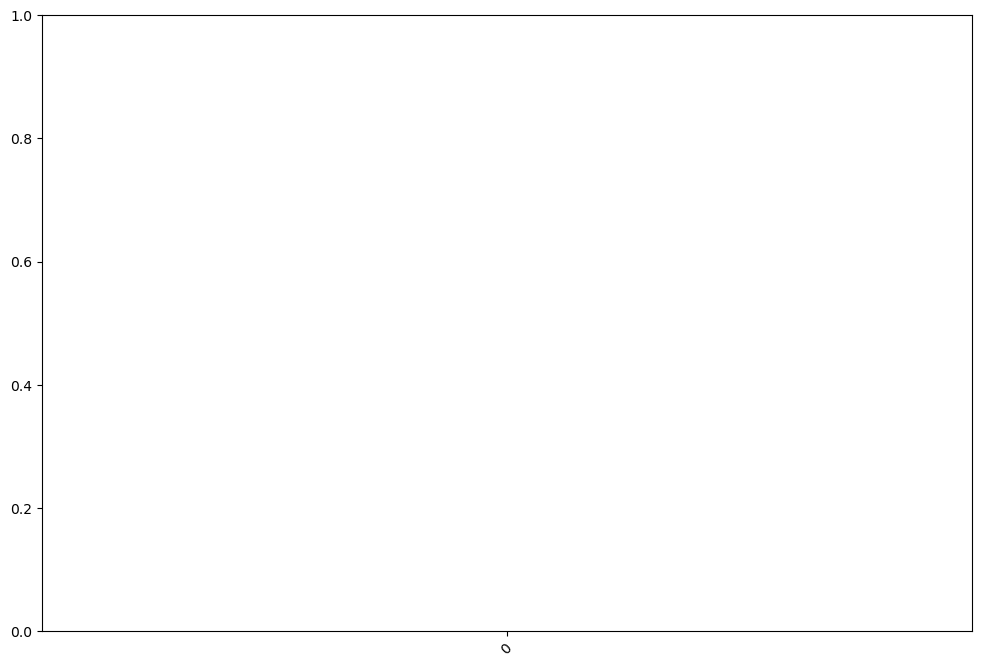

In [75]:
plt.figure(figsize=(12, 8))
sb.boxplot(df=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Categorical features
for top in df.top:
  if df[col].dtype == 'object':
    print(data[col].value_counts())

In [76]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [77]:
df = pd.get_dummies(df)

In [78]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [79]:
df.head()

,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;10;10;10;4;10;10;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;10;10;1;8;8;8;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;10;3;10;10;6;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;1;6;1;2;8;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;4;8;1;8;10;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;6;8;4;8;5;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;7;10;10;8;2;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;7;9;10;7;10;10;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;8;2;10;4;1;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;8;6;1;8;9;1;malignant,...,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;6;4;3;5;9;3;1;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;6;5;4;3;10;6;1;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;7;4;4;5;3;5;10;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;7;8;7;5;5;5;10;2;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;8;7;4;10;10;7;8;7;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;8;9;4;5;10;7;8;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;10;10;10;10;5;10;10;10;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;10;10;1;10;8;3;3;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;5;8;1;2;3;2;1;5;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;6;9;2;10;6;2;9;10;malignant
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [80]:
df

,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;10;10;10;4;10;10;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;10;10;1;8;8;8;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;10;3;10;10;6;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;1;6;1;2;8;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;4;8;1;8;10;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;6;8;4;8;5;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;7;10;10;8;2;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;7;9;10;7;10;10;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;8;2;10;4;1;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_10;10;10;8;6;1;8;9;1;malignant,...,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;6;4;3;5;9;3;1;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;6;5;4;3;10;6;1;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;7;4;4;5;3;5;10;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;7;8;7;5;5;5;10;2;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;8;7;4;10;10;7;8;7;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_8;8;9;4;5;10;7;8;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;10;10;10;10;5;10;10;10;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;10;10;1;10;8;3;3;1;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;5;8;1;2;3;2;1;5;malignant,clump;ucellsize;ucellshape;mgadhesion;sepics;bnuclei;bchromatin;normnucl;mitoses;classe_9;6;9;2;10;6;2;9;10;malignant
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Example classifier, replace it with your chosen classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [83]:
accuracy = accuracy_score
precision = precision_score
recall = recall_score

In [84]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: <function accuracy_score at 0x000001B93B20DEE0>
Precision: <function precision_score at 0x000001B93B20EF20>
Recall: <function recall_score at 0x000001B93B20F100>
